In [1]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection  import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import plot_model


###Reading the data

In [2]:
heart  = pd.read_csv("/content/heart_2020_cleaned.csv")
heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106460,No,21.63,Yes,No,No,7.0,0.0,No,Female,35-39,White,No,No,Good,7.0,No,No,No
106461,No,20.83,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,8.0,No,No,No
106462,No,27.37,No,No,No,0.0,0.0,No,Male,55-59,Black,No,Yes,Excellent,8.0,No,No,No
106463,No,27.27,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Good,6.0,No,No,No


In [3]:
heart.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke               True
PhysicalHealth       True
MentalHealth         True
DiffWalking          True
Sex                  True
AgeCategory          True
Race                 True
Diabetic             True
PhysicalActivity     True
GenHealth            True
SleepTime            True
Asthma               True
KidneyDisease        True
SkinCancer           True
dtype: bool

In [5]:
for column in heart.columns:
    if heart[column].dtype == 'float64' or heart[column].dtype == 'int64':
        # For numerical columns
        mean_value = heart[column].mean()
        heart[column].fillna(mean_value, inplace=True)
    elif heart[column].dtype == 'object':
        # For categorical columns
        mode_value = heart[column].mode()[0]
        heart[column].fillna(mode_value, inplace=True)

In [6]:
heart.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

In [7]:
heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,106465.000000,106465.000000,106465.000000,106465.000000
mean,28.266329,3.486146,3.950190,7.098512
std,6.413555,8.062891,8.000956,1.481706
min,12.020000,0.000000,0.000000,1.000000
25%,23.810000,0.000000,0.000000,6.000000
50%,27.260000,0.000000,0.000000,7.000000
75%,31.400000,2.000000,3.000000,8.000000
max,93.970000,30.000000,30.000000,24.000000


In [8]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106465 entries, 0 to 106464
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      106465 non-null  object 
 1   BMI               106465 non-null  float64
 2   Smoking           106465 non-null  object 
 3   AlcoholDrinking   106465 non-null  object 
 4   Stroke            106465 non-null  object 
 5   PhysicalHealth    106465 non-null  float64
 6   MentalHealth      106465 non-null  float64
 7   DiffWalking       106465 non-null  object 
 8   Sex               106465 non-null  object 
 9   AgeCategory       106465 non-null  object 
 10  Race              106465 non-null  object 
 11  Diabetic          106465 non-null  object 
 12  PhysicalActivity  106465 non-null  object 
 13  GenHealth         106465 non-null  object 
 14  SleepTime         106465 non-null  float64
 15  Asthma            106465 non-null  object 
 16  KidneyDisease     10

####Seperating categorical and numerical columns

In [9]:
categorical_columns = heart.select_dtypes(include=['object']).columns
numerical_columns = heart.select_dtypes(include=['int', 'float']).columns


In [17]:
categorical_columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [18]:
 numerical_columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

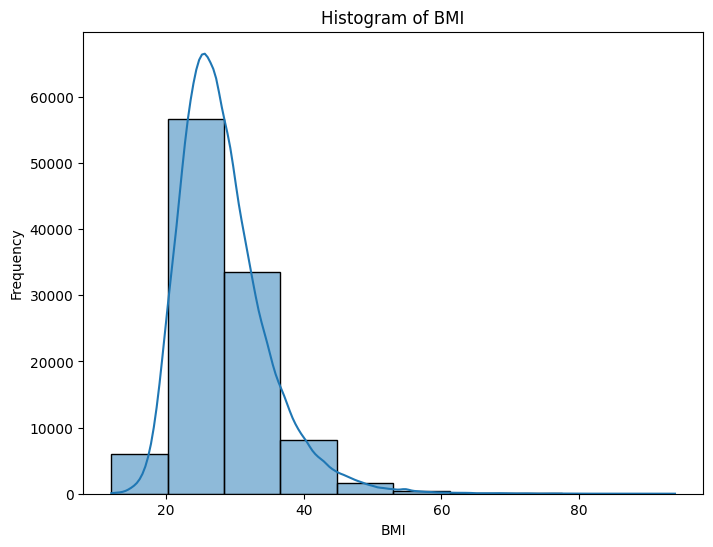

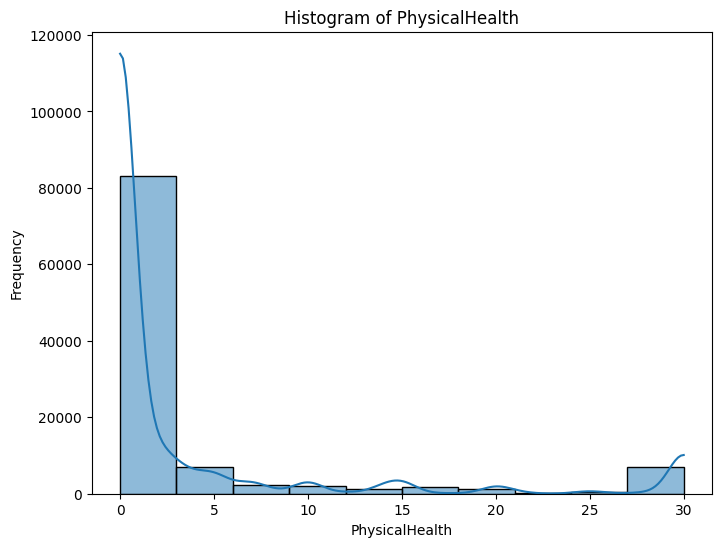

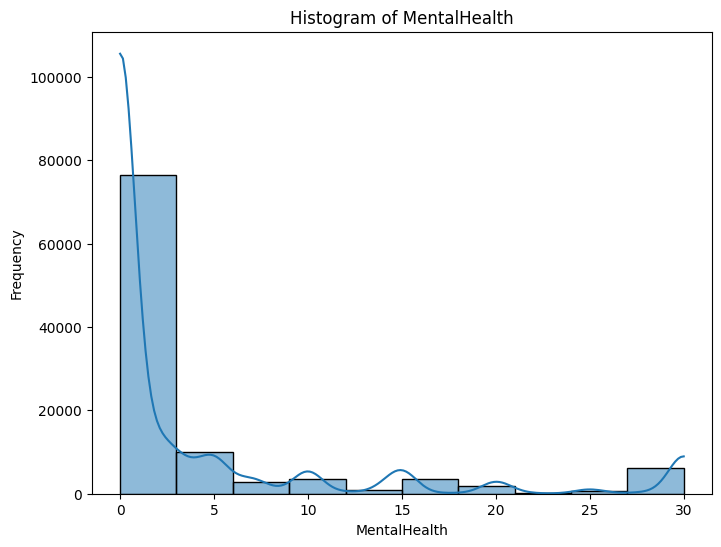

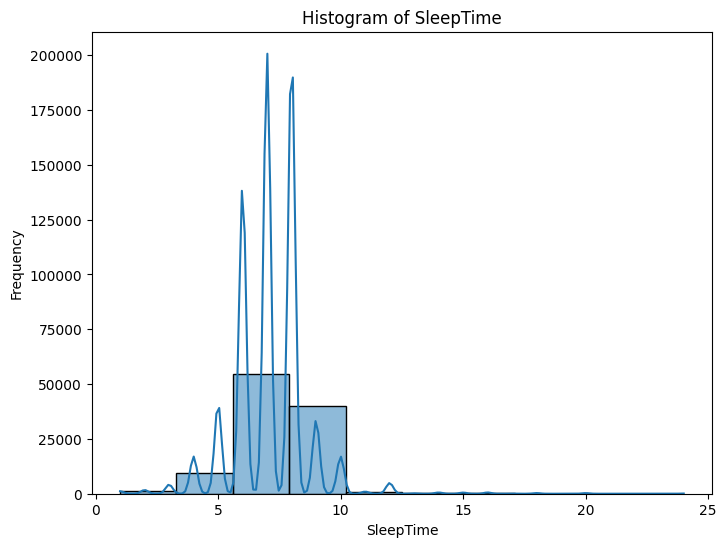

In [36]:
import seaborn as sns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(heart[col], bins=10, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

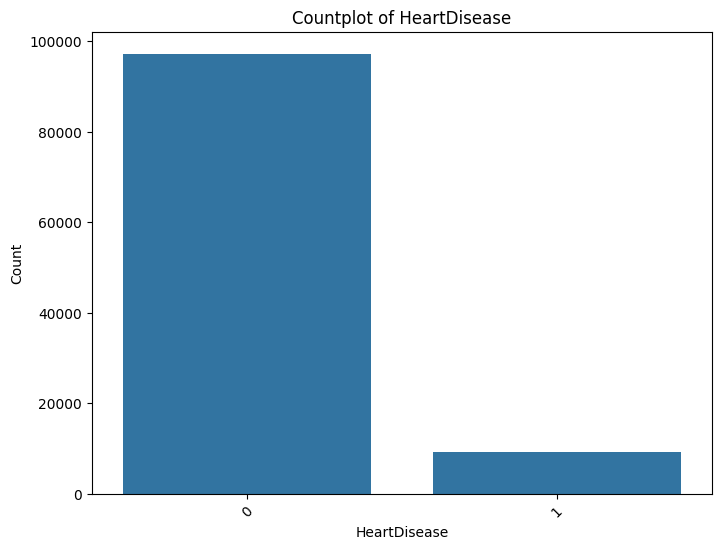

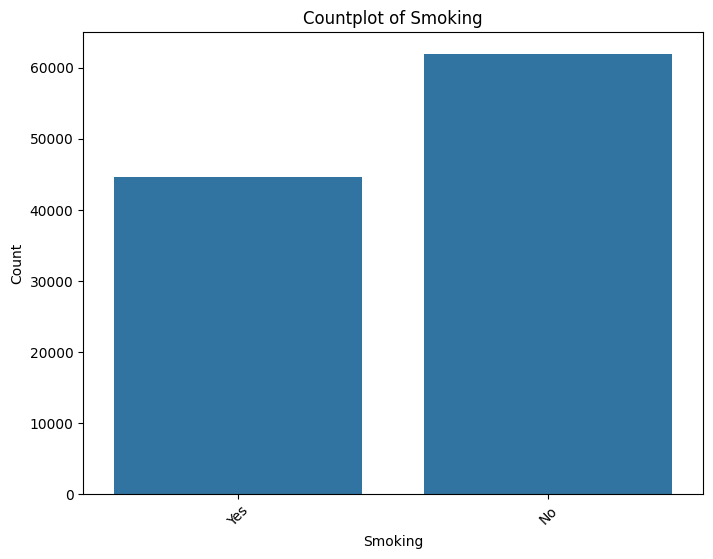

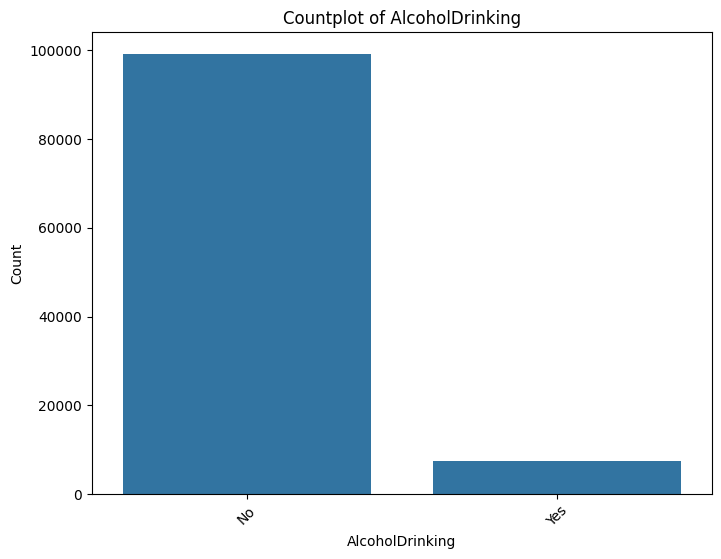

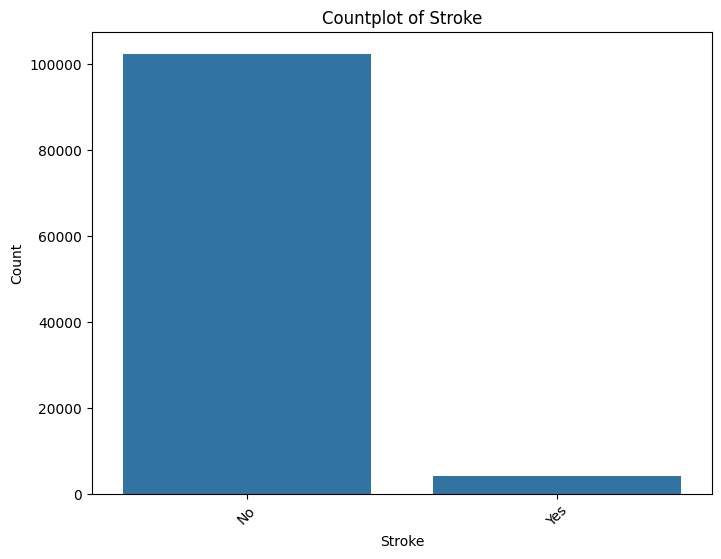

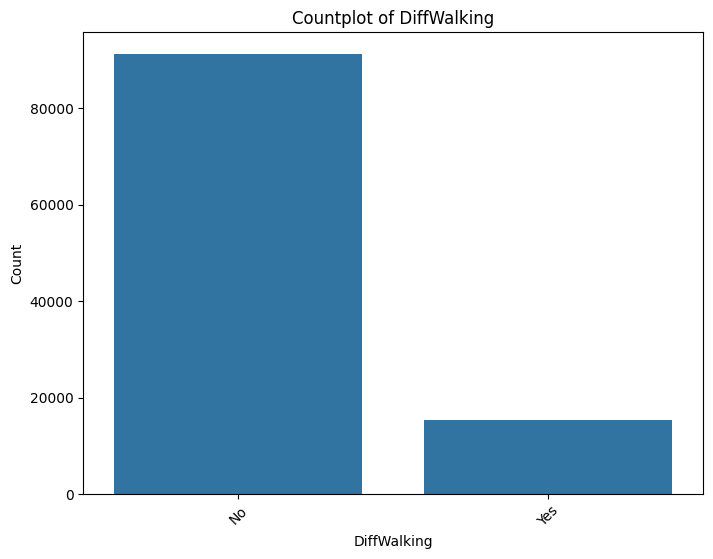

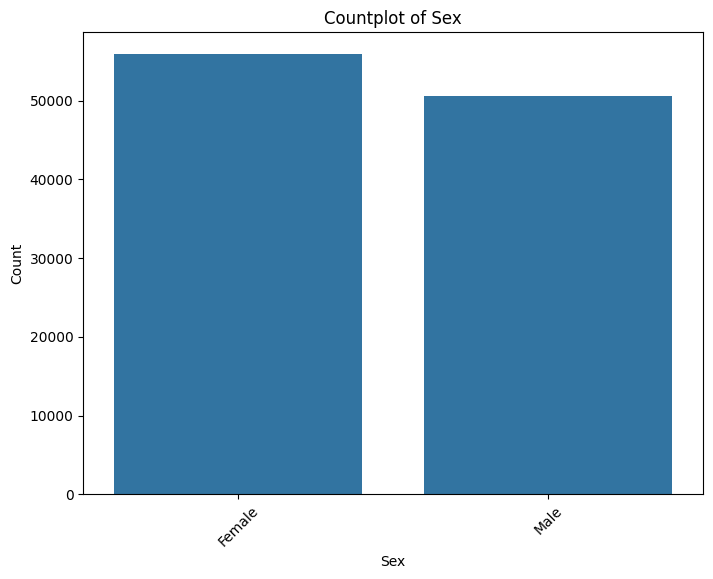

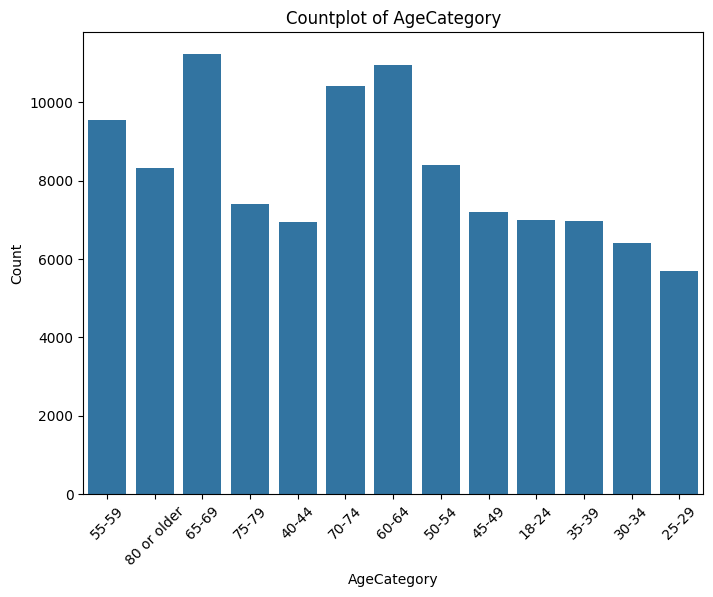

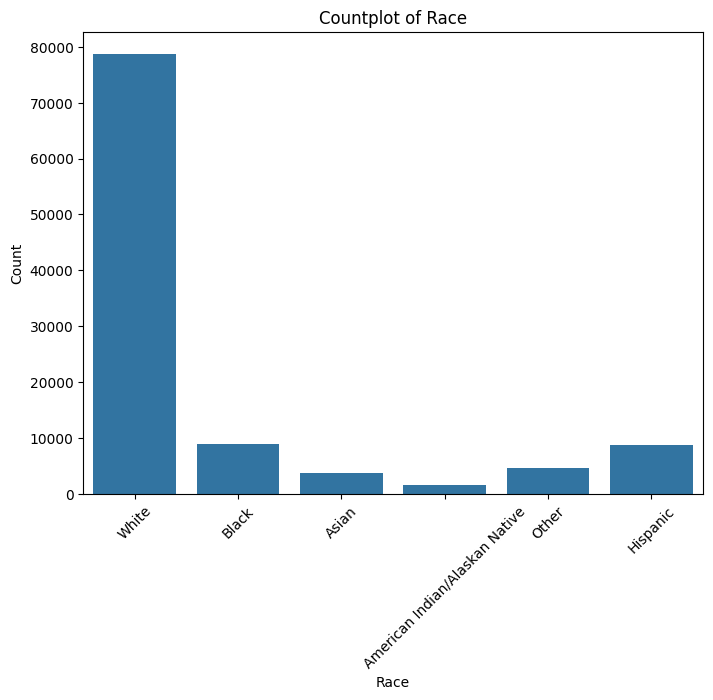

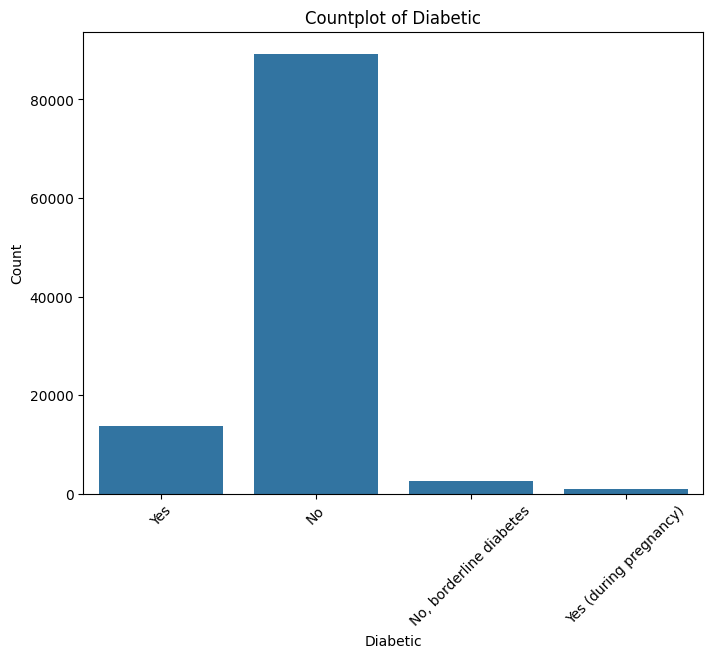

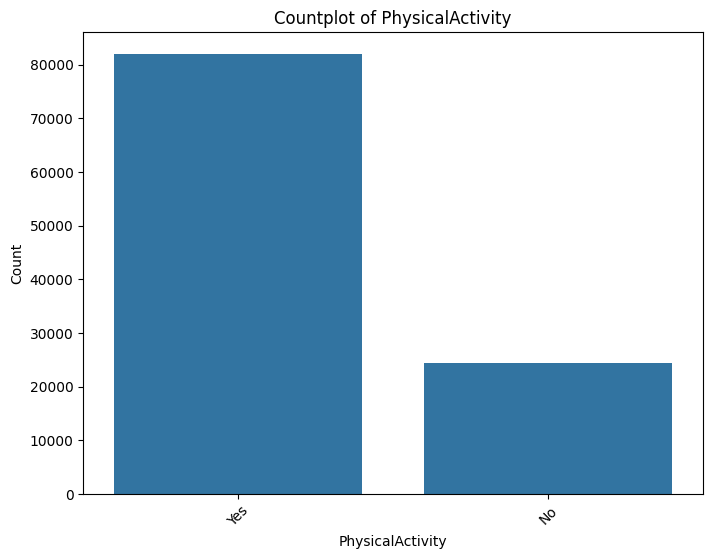

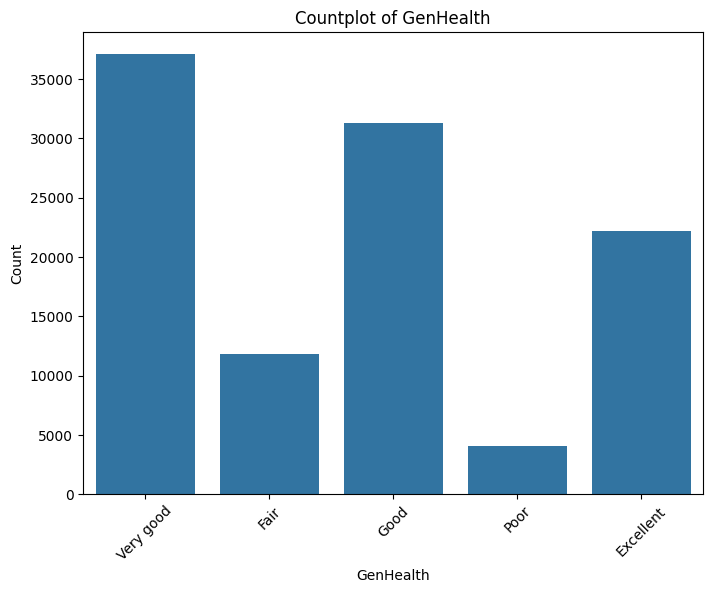

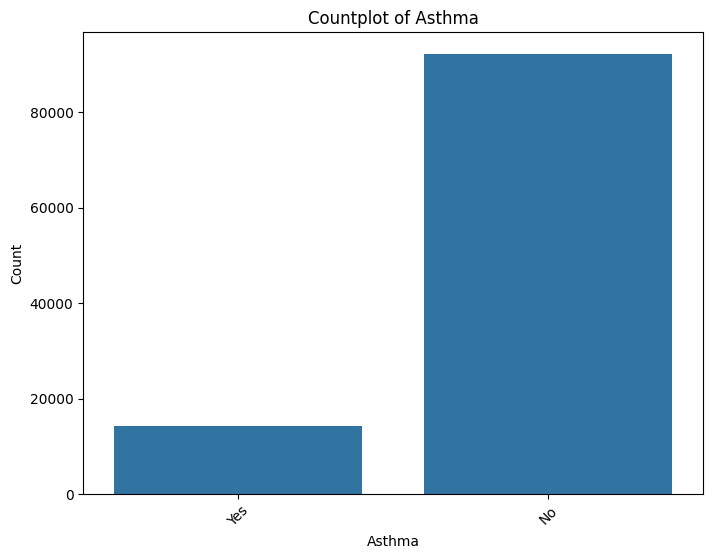

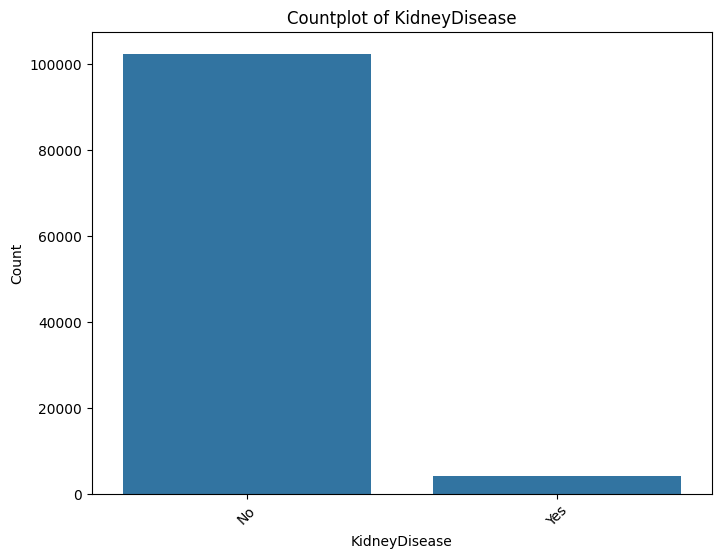

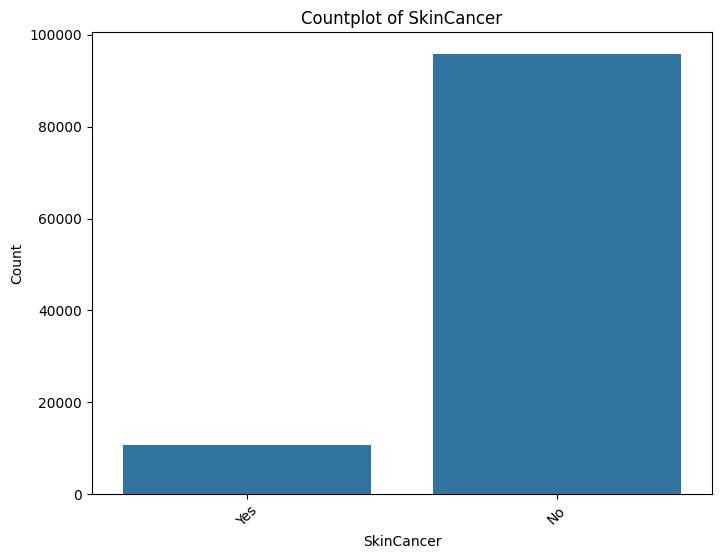

In [38]:
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=heart, x=col)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
heart["HeartDisease"]= encoder.fit_transform(heart["HeartDisease"])
heart["HeartDisease"]


0         0
1         0
2         0
3         0
4         0
         ..
106460    0
106461    0
106462    0
106463    0
106464    0
Name: HeartDisease, Length: 106465, dtype: int64

###One-hot encoding and Standardization

In [41]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]),
    (OneHotEncoder(handle_unknown="ignore"), ["Smoking", "AlcoholDrinking", "Stroke", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"])
)

###Seperating Features and Labels

In [44]:
X = heart.drop("HeartDisease",axis = 1)
y = heart["HeartDisease"]

In [39]:
#Train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size=0.3 , random_state = 42)

#Fitting the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


##Building a neural network  to fit on our normalized data

In [48]:
#Create a model
heart_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compiling the model
heart_model_1.compile(loss="mae",
                    optimizer="sgd",
                    metrics="mae")

#Fitting the model
history_1 = heart_model_1.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
2329/2329 [==============================] - 7s 3ms/step - loss: 0.1318 - mae: 0.1318
Epoch 2/100
2329/2329 [==============================] - 3s 1ms/step - loss: 0.0982 - mae: 0.0982
Epoch 3/100
2329/2329 [==============================] - 3s 1ms/step - loss: 0.0926 - mae: 0.0926
Epoch 4/100
2329/2329 [==============================] - 5s 2ms/step - loss: 0.0913 - mae: 0.0913
Epoch 5/100
2329/2329 [==============================] - 4s 2ms/step - loss: 0.0909 - mae: 0.0909
Epoch 6/100
2329/2329 [==============================] - 3s 1ms/step - loss: 0.0908 - mae: 0.0908
Epoch 7/100
2329/2329 [==============================] - 4s 2ms/step - loss: 0.0908 - mae: 0.0908
Epoch 8/100
2329/2329 [==============================] - 4s 2ms/step - loss: 0.0908 - mae: 0.0908
Epoch 9/100
2329/2329 [==============================] - 3s 1ms/step - loss: 0.0907 - mae: 0.0907
Epoch 10/100
2329/2329 [==============================] - 3s 1ms/step - loss: 0.0908 - mae: 0.0908
Epoch 11/100
2329/2

In [50]:
#Check the result of insurance model on the normalized data
heart_model_1.evaluate(X_test_normal,y_test)

999/999 [==============================] - 2s 2ms/step - loss: 0.0893 - mae: 0.0893


[0.08933215588331223, 0.08933215588331223]

Text(0.5, 0, 'epochs')

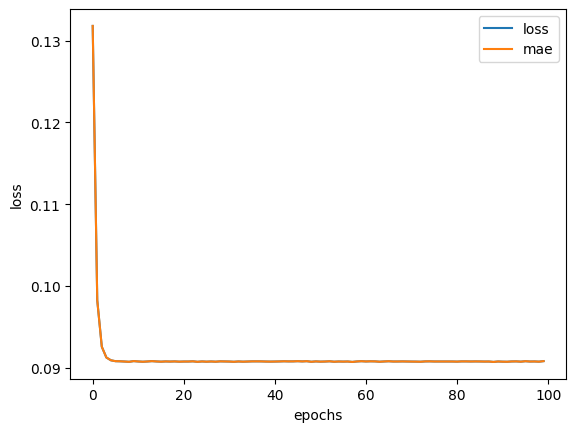

In [52]:
#Plot history also known as loss curve or training curve
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix
# Make predictions and evaluate performance
y_pred= heart_model_1.predict(X_test_normal)
threshold = 0.005
y_pred_binary = (y_pred > threshold).astype(int)

accuracy = accuracy_score(y_test,y_pred_binary)
precision_model1 = precision_score(y_test, y_pred_binary,average='weighted')
recall_model1 = recall_score(y_test, y_pred_binary, average='weighted')
f1_model1 = f1_score(y_test, y_pred_binary, average='weighted')

999/999 [==============================] - 2s 2ms/step


In [84]:
print("\nModel 1 Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision_model1)
print("Recall:", recall_model1)
print("F1 Score:", f1_model1)


Model 1 Metrics:
Accuracy: 0.6148090169067001
Precision: 0.8829716796859157
Recall: 0.6148090169067001
F1 Score: 0.6992020186352784


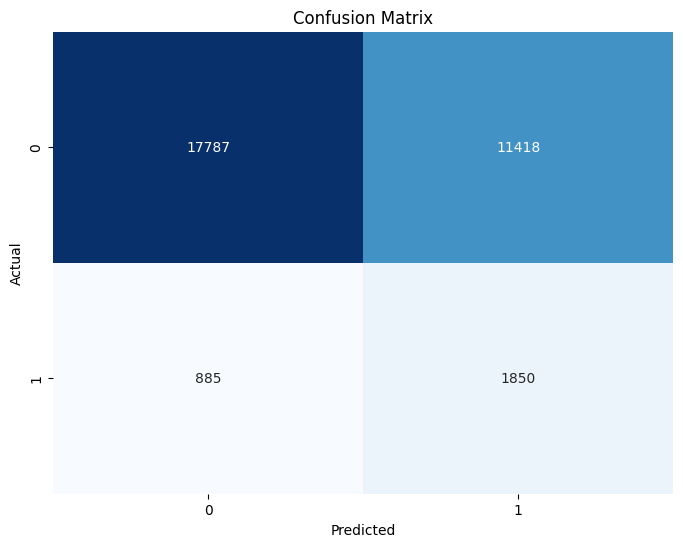

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



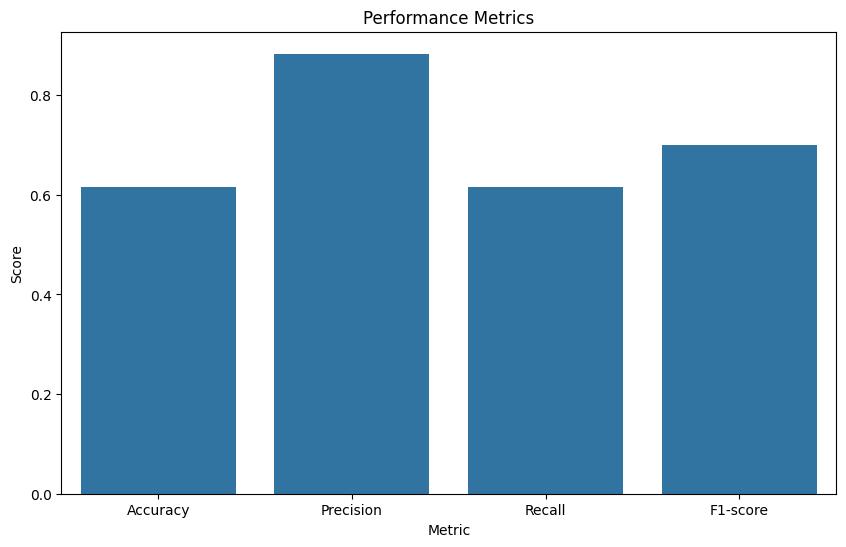

In [88]:
# Visualize performance metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision_model1,
    'Recall': recall_model1,
    'F1-score': f1_model1
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()


###Tweaking our model


In [89]:
#Create a model
heart_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compiling the model
heart_model_2.compile(loss="mae",
                    optimizer="adam",
                    metrics="mae")

#Fitting the model
history_2 = heart_model_2.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
2329/2329 [==============================] - 8s 3ms/step - loss: 0.1068 - mae: 0.1068
Epoch 2/100
2329/2329 [==============================] - 5s 2ms/step - loss: 0.0962 - mae: 0.0962
Epoch 3/100
2329/2329 [==============================] - 4s 2ms/step - loss: 0.0924 - mae: 0.0924
Epoch 4/100
2329/2329 [==============================] - 4s 2ms/step - loss: 0.0900 - mae: 0.0900
Epoch 5/100
2329/2329 [==============================] - 4s 2ms/step - loss: 0.0885 - mae: 0.0885
Epoch 6/100
2329/2329 [==============================] - 4s 2ms/step - loss: 0.0878 - mae: 0.0878
Epoch 7/100
2329/2329 [==============================] - 4s 2ms/step - loss: 0.0875 - mae: 0.0875
Epoch 8/100
2329/2329 [==============================] - 4s 2ms/step - loss: 0.0873 - mae: 0.0873
Epoch 9/100
2329/2329 [==============================] - 4s 2ms/step - loss: 0.0873 - mae: 0.0873
Epoch 10/100
2329/2329 [==============================] - 4s 2ms/step - loss: 0.0873 - mae: 0.0873
Epoch 11/100
2329/2

In [92]:
#Check the result of insurance model on the normalized data
heart_model_2.evaluate(X_test_normal,y_test)

999/999 [==============================] - 2s 2ms/step - loss: 0.0857 - mae: 0.0857


[0.08569896966218948, 0.08569896966218948]

Text(0.5, 0, 'epochs')

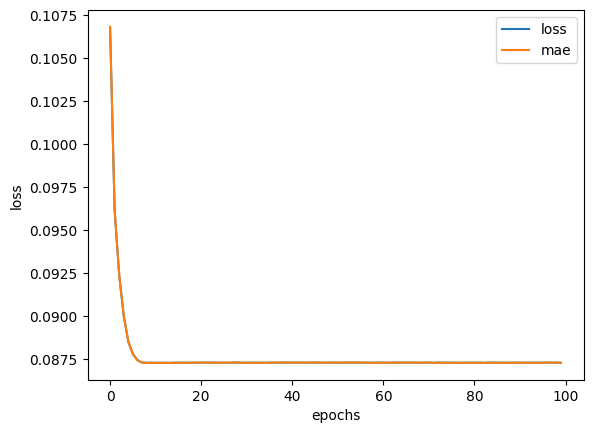

In [93]:
#Plot history also known as loss curve or training curve
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [94]:
# Make predictions and evaluate performance
y_pred_1= heart_model_1.predict(X_test_normal)
threshold = 0.005
y_pred_binary_1 = (y_pred_1 > threshold).astype(int)

accuracy_1 = accuracy_score(y_test,y_pred_binary)
precision_model2 = precision_score(y_test, y_pred_binary_1,average='weighted')
recall_model2 = recall_score(y_test, y_pred_binary_1, average='weighted')
f1_model2 = f1_score(y_test, y_pred_binary_1, average='weighted')

999/999 [==============================] - 3s 3ms/step


In [97]:
print("\nModel 1 Metrics:")
print("Accuracy:", accuracy_1)
print("Precision:", precision_model2)
print("Recall:", recall_model2)
print("F1 Score:", f1_model2)


Model 1 Metrics:
Accuracy: 0.6148090169067001
Accuracy: 0.6148090169067001
Precision: 0.8381274164357193
Recall: 0.8437695679398873
F1 Score: 0.8409307391854217


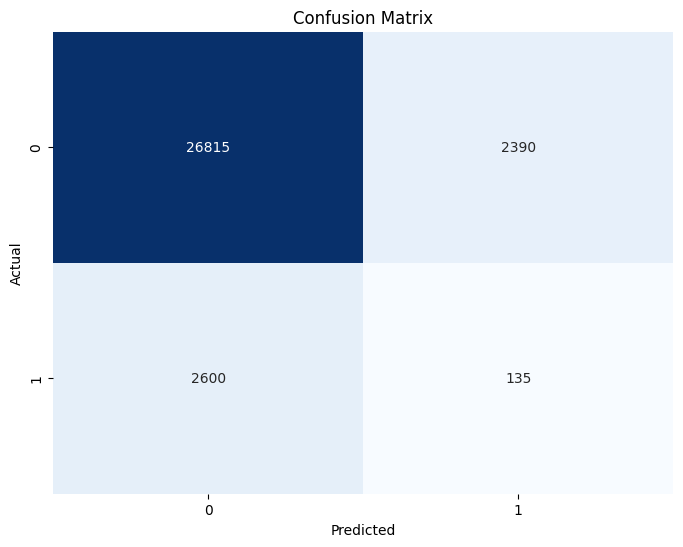

In [99]:


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary_1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



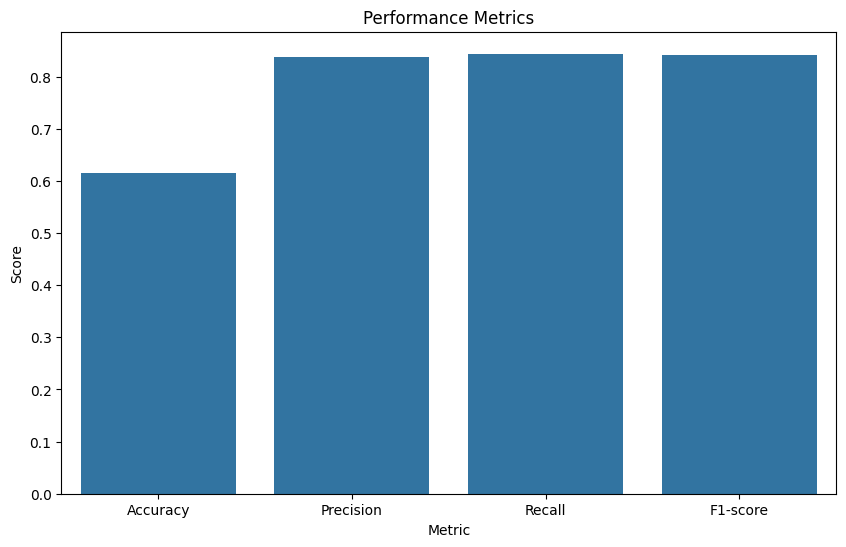

In [100]:
# Visualize performance metrics
metrics = {
    'Accuracy': accuracy_1,
    'Precision': precision_model2,
    'Recall': recall_model2,
    'F1-score': f1_model2
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()
